In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
sns.set()
%matplotlib inline

from bokeh.plotting import figure, show, output_notebook
from bokeh.models import WMTSTileSource

In [2]:
df = pd.read_csv('cleaned_data.csv')

In [3]:
print(df.shape)
df.head()

(3723394, 12)


,ride_id,rideable_type,start_station_name,start_lat,start_lng,member_casual,hour,dayofweek,month,ride_duration,distance,same_location
0,6C992BD37A98A63F,classic_bike,State St & Pearson St,41.897448,-87.628722,member,18,Monday,April,31.32,6.35,0
1,1887262AD101C604,classic_bike,Honore St & Division St,41.903119,-87.673935,member,9,Saturday,April,25.10,5.08,0
2,097E76F3651B1AC1,classic_bike,Clinton St & Polk St,41.871467,-87.640949,casual,18,Sunday,April,0.68,0.00,1
3,53C38EB01E6FA5C4,classic_bike,Ashland Ave & 63rd St,41.779374,-87.664843,casual,16,Saturday,April,1.43,0.00,1
4,D53AC014EFD6E2BA,electric_bike,Dorchester Ave & 49th St,41.805832,-87.592478,casual,16,Tuesday,April,25.83,0.02,1


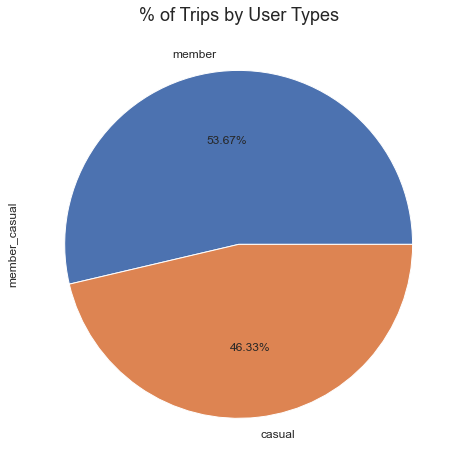

In [4]:
plt.figure(figsize=(12,8))
df['member_casual'].value_counts().plot.pie(autopct='%1.2f%%', fontsize=12)
plt.title('% of Trips by User Types', fontsize=18)
plt.show()

### Most Popular Bike Type

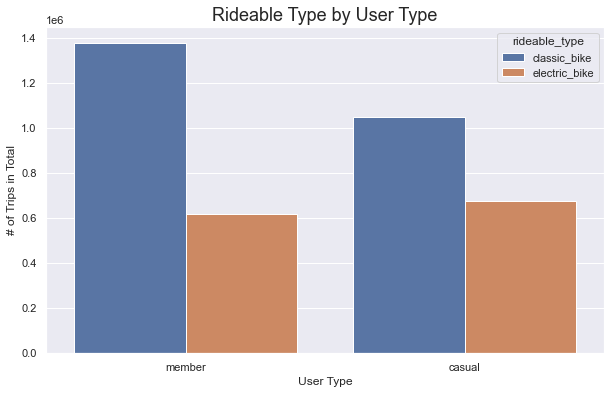

In [5]:
plt.figure(figsize=(10,6))
sns.countplot(x='member_casual', hue='rideable_type', data=df)
plt.title('Rideable Type by User Type', fontsize=18)
plt.xlabel('User Type')
plt.ylabel('# of Trips in Total')
plt.show()

- There are two types of bikes: classic and electric. For both members and casual users, classic bike is the most popular option.

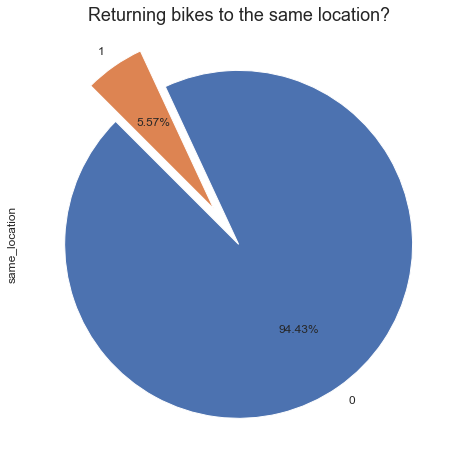

In [6]:
plt.figure(figsize=(12,8))
df['same_location'].value_counts().plot.pie(explode=[0, 0.25], autopct='%1.2f%%', fontsize=12, startangle=135)
plt.title('Returning bikes to the same location?', fontsize=18)
plt.show()

Users generally take bikes in one location and return it to another location.

5.57% of the trips ended in the same location.

### Traffic by Month

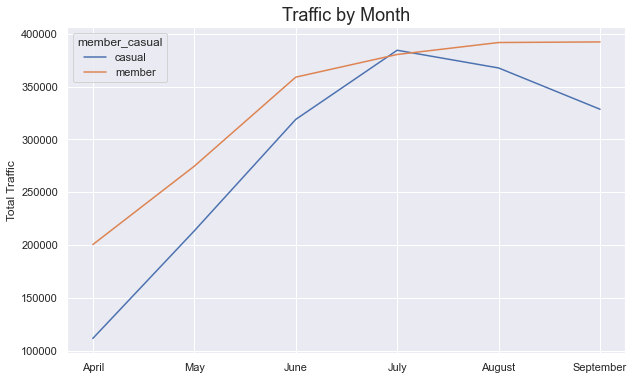

In [11]:
plt.figure(figsize=(10,6))
df['month'] = pd.Categorical(df['month'],categories=['April', 'May', 'June', 'July', 'August', 'September'], ordered=True)
traffic_month = df.groupby(['month', 'member_casual'], as_index=False).agg(traffic=('ride_id', 'count'))
sns.lineplot(x='month', y='traffic', hue='member_casual', data=traffic_month)

plt.title('Traffic by Month', fontsize=18)
plt.xlabel('')
plt.ylabel('Total Traffic')
plt.show()

- The lowest traffic was in April.
- The members' highest traffic was in August and September
- The casual users' highest traffic was in July.


### Average Traffic by Days of Week

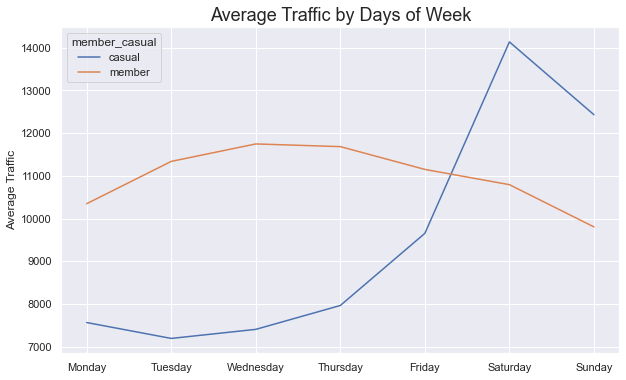

In [13]:
df['dayofweek'] = pd.Categorical(df['dayofweek'],categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
traffic_weekday = df.groupby(['dayofweek', 'member_casual'], as_index=False).agg(traffic=('ride_id', 'count'))
traffic_weekday['traffic'] = traffic_weekday['traffic']/26
plt.figure(figsize=(10,6))
sns.lineplot(x='dayofweek', y='traffic', hue='member_casual', data=traffic_weekday)

plt.title('Average Traffic by Days of Week', fontsize=18)
plt.xlabel('')
plt.ylabel('Average Traffic')
plt.show()

- Casual users' traffic is low during weekdays. It increases by Friday and peaks at Saturday.
- Members are almost opposite of that. It is higher during weekdays and the traffic decreases at weekend.

### Average Traffic by Hour

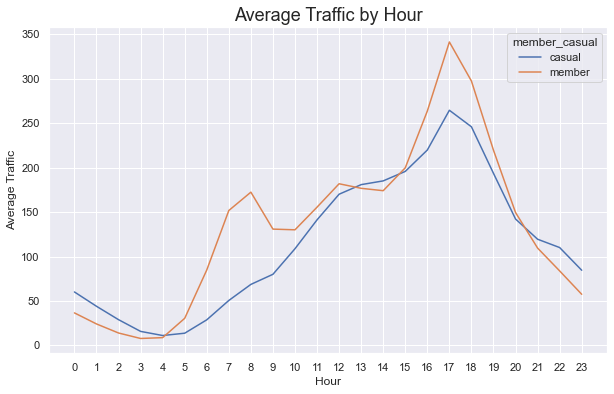

In [14]:
traffic_hour = df.groupby(['hour', 'member_casual'], as_index=False).agg(traffic=('ride_id', 'count'))
traffic_hour['traffic'] = traffic_hour['traffic']/(26*24)
plt.figure(figsize=(10,6))
sns.lineplot(x='hour', y='traffic', hue='member_casual', data=traffic_hour)

plt.title('Average Traffic by Hour', fontsize=18)
plt.xticks([*range(0,24,1)])
plt.xlabel('Hour')
plt.ylabel('Average Traffic')
plt.show()

- During the day, both member and casual users creates the most traffic between 12:00 and 19:00. The traffic gets its peak at 17:00 for both.
- Members' traffic makes another peak at 08:00. Other than that, there is no difference between members and casual users. It is important to note that annual members' traffic peaks at 08:00 and 17:00, which are the start and end of business hours.

### Average Ride Duration by Bike Type

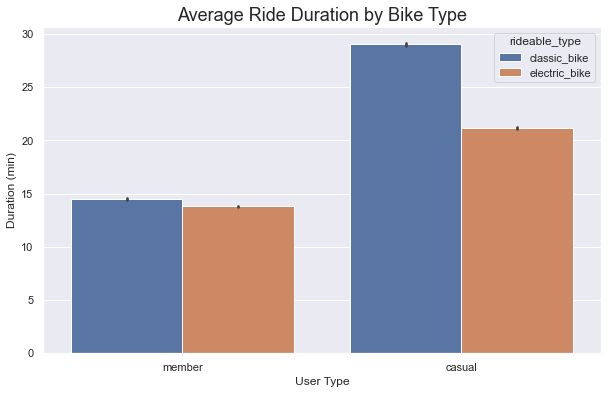

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(x='member_casual', y='ride_duration', hue='rideable_type', data=df)
plt.title('Average Ride Duration by Bike Type', fontsize=18)
plt.xlabel('User Type')
plt.ylabel('Duration (min)')
plt.show()

- Casual users ride bikes longer than members. 
- Not much difference between bike types.

### Average Ride Duration by Days of Week

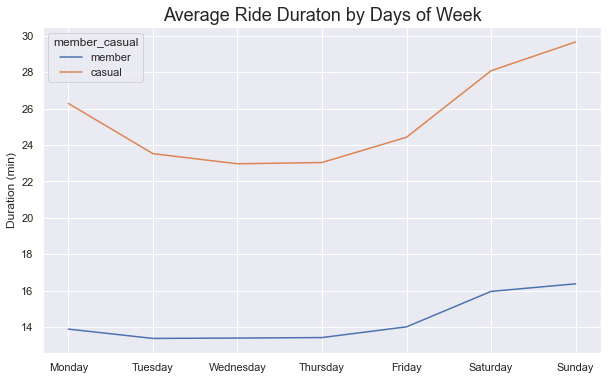

In [16]:
plt.figure(figsize=(10,6))
sns.lineplot(x='dayofweek', y='ride_duration', hue='member_casual', ci= None, data=df)
plt.title('Average Ride Duraton by Days of Week', fontsize=18)
plt.xlabel('')
plt.ylabel('Duration (min)')
plt.show()

- Ride duration gets longer during weekends for both user types.

### Average Ride Distance by Bike Type

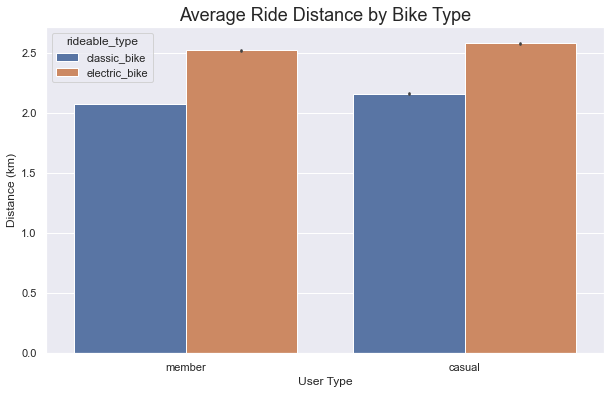

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(x='member_casual', y='distance', hue='rideable_type', data=df)
plt.title('Average Ride Distance by Bike Type', fontsize=18)
plt.xlabel('User Type')
plt.ylabel('Distance (km)')
plt.show()

- both users travel relatively longer distances with electric bikes.
- not much difference in average ride distances between user types. 

### Exploring Correlations

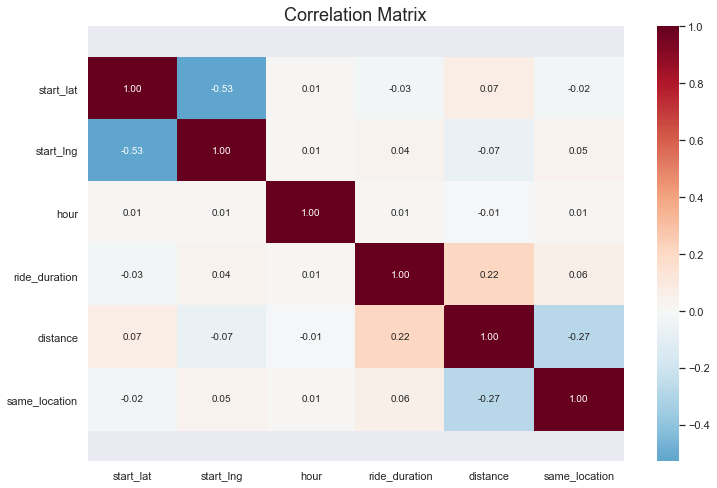

In [7]:
correlation = df.corr()
plt.figure(figsize=(12,8))
ax = sns.heatmap(correlation, center=0, annot=True, cmap='RdBu_r', fmt='0.2f')
l, r = ax.get_ylim()
ax.set_ylim(l + 0.5, r - 0.5)
plt.yticks(rotation=0)
plt.title('Correlation Matrix', fontsize=18)
plt.show()

There is a positive correlation (low degree, <0.3) between ride distance and ride duration, r=.22.

### Casual Users' Top 10 Stations

In [21]:
casual_top10= df.start_station_name.value_counts().head(10).index.to_list()
casual_top10_stations = df[df.start_station_name.isin(casual_top10)].groupby('start_station_name', as_index=False).agg(total_traffic = ('ride_id', 'count'),lat=('start_lat','mean'), long=('start_lng','mean'))
print(casual_top10_stations)

        start_station_name  total_traffic        lat       long
0  Clark St & Armitage Ave          23298  41.918307 -87.636292
1        Clark St & Elm St          28190  41.902937 -87.631369
2   Clark St & Lincoln Ave          24676  41.915701 -87.634606
3    Michigan Ave & Oak St          31593  41.900971 -87.623764
4          Millennium Park          25338  41.881062 -87.624085
5  Streeter Dr & Grand Ave          55009  41.892273 -87.612052
6      Theater on the Lake          27218  41.926271 -87.630858
7   Wabash Ave & Grand Ave          22014  41.891442 -87.626745
8    Wells St & Concord Ln          31518  41.912107 -87.634704
9        Wells St & Elm St          26619  41.903190 -87.634386


In [22]:
# visualizing casual users' top 10 stations
def web_mercator(data, long='long', lat='lat'):
    #Convert dec long/lat to Web Mercator format
    k= 6378137
    data['x'] = data[long] * (k*np.pi/180.0)
    data['y'] = np.log(np.tan((90+ data[lat])*np.pi/360))*k
    return data


map_df = web_mercator(casual_top10_stations)

p = figure(tools='pan, wheel_zoom', x_range=(-9780000, -9745000), y_range=(5130000, 5160000),
           x_axis_type="mercator", y_axis_type="mercator")

url = 'https://a.basemaps.cartocdn.com/rastertiles/voyager/{Z}/{X}/{Y}.png'
attribution = 'Tiles by Carto, under CC BY 3.0. Data by OSM, under 0DbL'

p.add_tile(WMTSTileSource(url=url, attribution=attribution))
p.circle(x=map_df['x'], y=map_df['y'], fill_color='firebrick', size=15)


output_notebook()
show(p)
# note: there is a screenshot below. Bokeh need to be run to see the map. 

Loading BokehJS ...

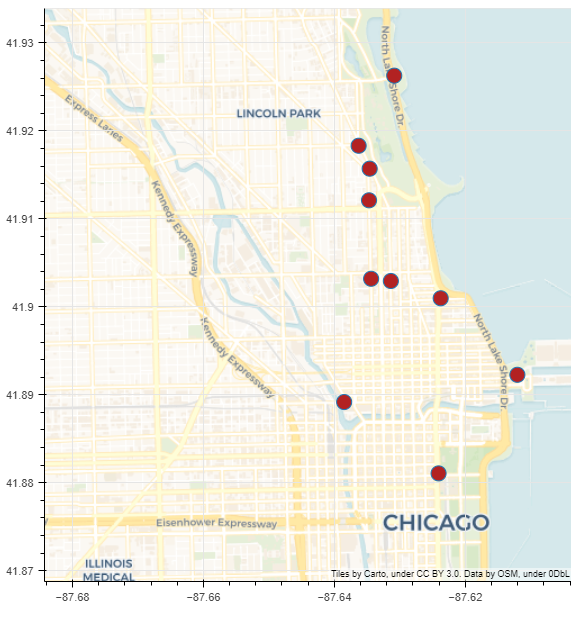
- a screenshot of the map

### Exploring traffic and stations

In [10]:
# How many stations are there in total?
len(df.start_station_name.unique())

773

In [11]:
# the top 100 stations' traffic corresponds to ?
top100_percent = df.start_station_name.value_counts().head(100).sum()/df.start_station_name.value_counts().sum()*100
print(f"The top 100 stations' traffic corresponds to {round(top100_percent,2)}% of all traffic.")

The top 100 stations' traffic corresponds to 49.26% of all traffic.


There are 773 stations, but almost half of the traffic comes from the top 100 stations.

In [12]:
# the top 100 stations with most traffic by user types, is it same?
station_casual = df[df.member_casual == 'casual'].start_station_name.value_counts().head(100).index.to_list()
station_member = df[df.member_casual == 'member'].start_station_name.value_counts().head(100).index.to_list()

count = 0
for i in range(100):
    if station_casual[i] in station_member:
        count = count+1

print(count)

78


Top 100 stations are not exactly the same for annual members and casual users. 78 of them are the same. 22 stations are different.